In [2]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
import numpy as np
import tensorflow as tf
from keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.optimizers import SGD
# fix dimension ordering issue
from keras import backend as K
K.set_image_data_format('channels_last')

In [3]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0],28,28,1))
testX = testX.reshape((testX.shape[0],28,28,1))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
num_classes = testY.shape[1]

In [5]:
def larger_CNN2():
    # build a sequential model
    model = Sequential()
    # 1st conv block
    model.add(Conv2D(32, (5, 5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    # 2nd conv block
    model.add(Conv2D(64, (5, 5), activation='relu', strides=(2, 2), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(BatchNormalization())
    # 3rd conv block
    model.add(Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(BatchNormalization())
    # ANN block
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(units=100, activation='relu'))
    model.add(Dense(units=100, activation='relu'))
    # output layer
    model.add(Dense(units=10, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

    return model

In [6]:
# Incorporating reduced learning and early stopping for callback
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, early_stopping]

In [7]:
# build the model
model3 = larger_CNN2()
# Fit the model
history = model3.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=200, verbose=2,callbacks=callbacks)
# Final evaluation of the model
scores = model3.evaluate(testX, testY, verbose=0)

Epoch 1/10
300/300 - 56s - loss: 0.1795 - accuracy: 0.9468 - val_loss: 0.0801 - val_accuracy: 0.9748
Epoch 2/10
300/300 - 37s - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.0363 - val_accuracy: 0.9880
Epoch 3/10
300/300 - 37s - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0535 - val_accuracy: 0.9826
Epoch 4/10
300/300 - 37s - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0342 - val_accuracy: 0.9898
Epoch 5/10
300/300 - 37s - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0477 - val_accuracy: 0.9855
Epoch 6/10
300/300 - 37s - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.0381 - val_accuracy: 0.9884

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 7/10
300/300 - 37s - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0235 - val_accuracy: 0.9936
Epoch 8/10
300/300 - 37s - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0241 - val_accuracy: 0.9932
Epoch 9/10
300/300 - 37s - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0222 - val_accuracy: 0.9938
Epoch 10/

In [8]:
model3.summary()
print("Larger CNN Error: %.2f%%" % (100-scores[1]*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3, 3, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0

In [9]:
y_pred = model3.predict(testX)
y_pred = np.argmax(np.round(y_pred),axis=1)

In [10]:
import numpy as np
testY=np.argmax(testY, axis=1)
testY[1]

2

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - testY)))
print("Mean sum of squares (MSE): %.2f" % np.mean((y_pred - testY)** 2))
rmse = np.sqrt(np.mean((y_pred - testY)** 2))
print("RMSE: %.2f%%" % rmse)
print("R2-score: %.2f" % r2_score(y_pred, testY))
print("Larger CNN Error: %.2f%%" % (100-scores[1]*100))

Mean absolute error: 0.03
Mean sum of squares (MSE): 0.15
RMSE: 0.39%
R2-score: 0.98
Larger CNN Error: 0.71%


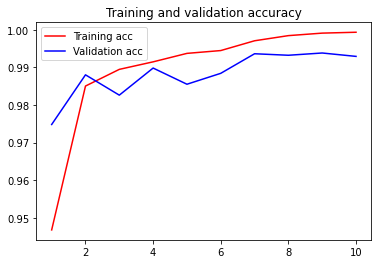

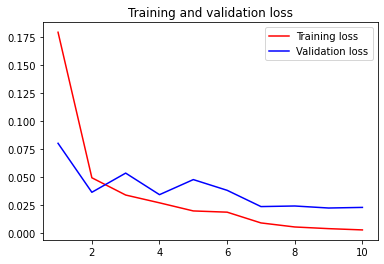

In [12]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

pyplot.title('Training and validation accuracy')
pyplot.plot(epochs, acc, 'red', label='Training acc')
pyplot.plot(epochs, val_acc, 'blue', label='Validation acc')
pyplot.legend()

pyplot.figure()
pyplot.title('Training and validation loss')
pyplot.plot(epochs, loss, 'red', label='Training loss')
pyplot.plot(epochs, val_loss, 'blue', label='Validation loss')

pyplot.legend()

pyplot.show()